<a href="https://colab.research.google.com/github/AmiltonFerreira/airbnb/blob/main/Airbnb_Data_Analysis_Bangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://github.com/AmiltonFerreira/data_science/blob/main/banner.png?raw=true">

# A quantitative analysis of Airbnb data for Bangkok
*by Amilton Ferreira, student at* &nbsp;
[<img alt="sigmoidal" width="9%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">](https://sigmoidal.ai)

<br>

Nowadays, when looking for accommodation, [Airbnb](https://www.airbnb.com.br/) is certainly one of the services that comes to mind.

<center><img alt="Analisando Airbnb" width="20%" src="https://news.airbnb.com/wp-content/uploads/sites/4/2020/04/Airbnb_Lockup_Over_Gradient.png"></center>


It works as an online marketplace that allows people to easily rent their homes, or rooms, to guests looking for a short-term rental.

Born in San Francisco, in 2007, Airbnb now has over 4 million hosts who have welcomed more than 1 billion guest arrivals, in about 100 thousand cities around the world [1].

This innovative business model generates a large amount of data. This attracts the interest of researchers, in particular, data scientists, seeking to understand the dynamics involved as well as possible insights that could impact communities.

Within this scope, we will analyze data from the platform's top trending global destination during the year 2022: **Bangkok, Thailand** [2].

<br>

<center><img alt="Bangkok" width="40%" src="https://images.unsplash.com/photo-1531169628939-e84f860fa5d6?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80"> <figcaption>Photo by Braden Jarvis on Unsplash</figcaption> </center>

<br>

Bangkok is Thailand's capital and most populous city, a country located in Southeast Asia. Its popularity for tourism is due to the diversity of attractions that the city offers. Many look to historical attractions or religious temples like Wat Phra Sri Rattanasamaram (Phra Kaew). But there are also palaces, museums, parks, as well as several shopping centers. Not to mention the dynamic nightlife.

<br>

<center><img alt="Bangkok" width="40%" src="https://images.unsplash.com/photo-1591454162837-b50552ebec8e?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80"> <figcaption>Photo by srihari kapu on Unsplash</figcaption> </center>

<br>

The data used in this analysis was obtained from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html), “a mission driven project that provides data and advocacy about Airbnb's impact on residential communities” [3].

Let’s check out which ideas we can infer from the data.

## Obtaining Data


At first, it's necessary to import the libraries that will be used. **Pandas** is an open-source library to work with data structures and data analysis tools for the Python programming language. **Matplotlib.pyplot** and **Seaborn** are used for plotting, creating graphics, and working with figures. And **Missingno** allows quick visualizations of missing data.


In [ ]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

Then import the ".csv" file with the data that will be explored. In this case, the file was previously downloaded from "Inside Airbnb" to a GitHub repository.

In [ ]:
# import the file ".csv" as a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/AmiltonFerreira/airbnb/main/listings.csv')

## Exploratory Data Analysis (EDA)


### **Preview data**

**Preliminary Data Processing**

At first, we shall read our dataset and generate a simple preview and statistics of the data.

In [ ]:
# general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16640 non-null  int64  
 1   name                            16631 non-null  object 
 2   host_id                         16640 non-null  int64  
 3   host_name                       16640 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16640 non-null  object 
 6   latitude                        16640 non-null  float64
 7   longitude                       16640 non-null  float64
 8   room_type                       16640 non-null  object 
 9   price                           16640 non-null  int64  
 10  minimum_nights                  16640 non-null  int64  
 11  number_of_reviews               16640 non-null  int64  
 12  last_review                     

The Data Frame is composed of 16640 entries (lines) with 18 attributes (variables or columns).

There are no **non-null** values ​​for **neighbourhood_group** or **license**. So these columns will be discarded when clearing the data.

Also, each attribute has its type, which can be converted according to the necessity of this analysis. 

In [ ]:
# show the first 5 entries of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45305964,Lumpini ville Nakhon in - River view studio Cozy,177103834,Thanat,NaN,Bang Sue,13.83689,100.50330,Entire home/apt,388,360,0,NaN,NaN,1,365,0,NaN
1,8975471,[Monthly] Plum Condominium Paholyothin 89,46549310,Chakree,NaN,Don Mueang,13.96994,100.61852,Private room,5000,300,0,NaN,NaN,1,362,0,NaN
2,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,2034,3,65,2020-01-06,0.51,2,362,0,NaN
3,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1405,1,0,NaN,NaN,2,358,0,NaN
4,31508092,Room for rent good and cheap,223483764,Huangseng,NaN,Bang Na,13.66075,100.57991,Private room,700,1,0,NaN,NaN,1,365,0,NaN


In [ ]:
# show the last 5 entries of the DataFrame
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
16635,39158519,"Impact Apartment, near IMPACT Challenger",260144775,Eve,NaN,Lak Si,13.91114,100.54964,Entire home/apt,680,1,0,NaN,NaN,10,139,0,NaN
16636,30163025,Netipon residence,44921338,Netipon,NaN,Bang Na,13.65453,100.60488,Entire home/apt,499,1,1,2018-12-03,0.02,1,263,0,NaN
16637,14997576,One Bedroom Condo Close to the City and Facili...,94577344,Suchada,NaN,Bang Na,13.65102,100.61308,Entire home/apt,630,7,0,NaN,NaN,2,358,0,NaN
16638,7623057,Affordable 1BedRoom Condo close2BTS,33550104,Kasamsan,NaN,Bang Na,13.65399,100.60605,Entire home/apt,4438,6,78,2020-11-02,0.91,7,364,0,NaN
16639,27847801,Comfy & Clean 1 Bedroom with Pool View at The ...,210308325,Ammy,NaN,Lak Si,13.89610,100.55131,Entire home/apt,750,7,9,2020-01-04,0.18,1,294,0,NaN


The first and last 5 entries confirm that the data is correctly structured in the Data Frame.

**Variables dictionary**

* `id` - identification number generated for the residence
* `name` - advertised residence name
* `host_id` - host (residence owner) identification number
* `host_name` - host name
* `neighbourhood_group` - residence borough
* `neighbourhood` - residence neighbourhood
* `latitude` - residence latitude coordinate
* `longitude` - residence longitude coordinate
* `room_type` - type of room
* `price` - rental price in local currency (baht)
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - number of reviews the residence has
* `last_review` - date of the last review
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of residences from the same host
* `availability_365` - number of days of availability within 365 days
* `number_of_reviews_ltm` - number of reviews in the last twelve months
* `license` - rental registration number


Before commencing to clean the data, it is good practice to change some of the **types** to better suit the research. So, in this case, **room_type** and **neighbourhood** will be converted to "category", and "last_review" to "datetime". Converting "string" variables (object) to categorical ones saves some memory, and "datetime" allows us to work with time series.

In [ ]:
# set as categorical data
df.room_type = df.room_type.astype('category')
df.neighbourhood = df.neighbourhood.astype('category')

# set as datetime data
df.last_review = pd.to_datetime(df.last_review)

### Data cleaning


**Missing values**

Now we are going to check where exactly in the Data Frame are the missing or nonvalid data.

In [ ]:
# variables sorted by the percentage of their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.395012
last_review                       0.395012
name                              0.000541
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

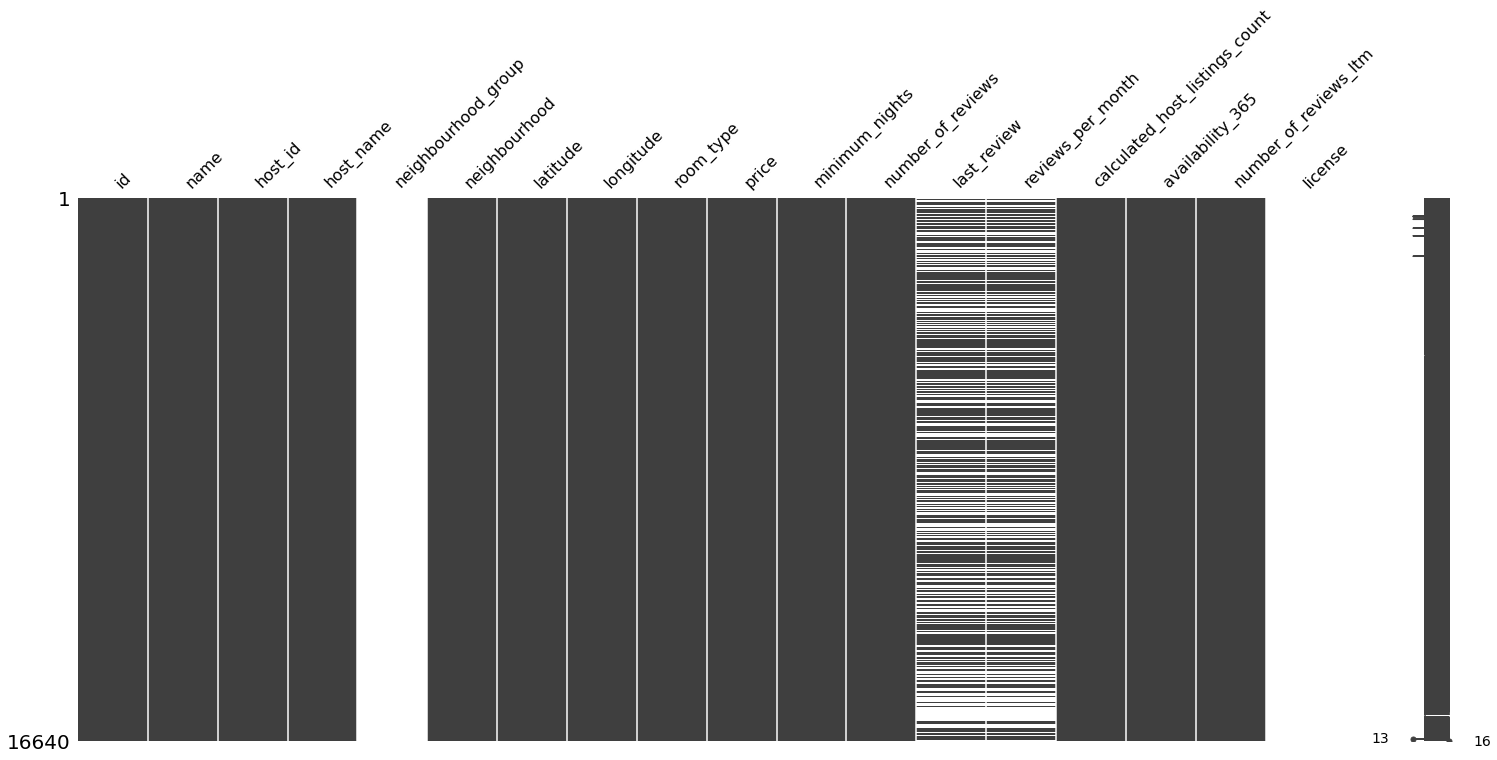

In [ ]:
# generates a visualization of the entries with null values
missingno.matrix(df)
plt.show()

Since **license** and **neighbourhood_group** have no valid values, both columns will be discarded.

It is also noticeable that **reviews_per_month** and **last_review** have a large number of null values ​​(almost 40%). However, their entries will remain in the data frame as these two attributes are of minor importance in this analysis.

The **name** variable has a very small amount of null values ​​(0.05%). So, if necessary, the entries could be rejected without too much concern.


In [ ]:
# creating a copy of the original DataFrame to be cleaned
df_clean = df.copy(deep=True)

In [ ]:
# cleaning the created DataFrame
df_clean.drop(['license', 'neighbourhood_group'], inplace=True, axis=1)

**Duplicated Entries**

Looking for duplicated entries is also a necessary step to avoid wrong conclusions.

In [ ]:
# check for duplicated entries
df.duplicated().sum()

0

There are no duplicated entries in this Data Frame.

**Distribution and outliers**

At this point, we are going to look into the distribution of the numeric variables and eliminate the outliers without losing relevant data.

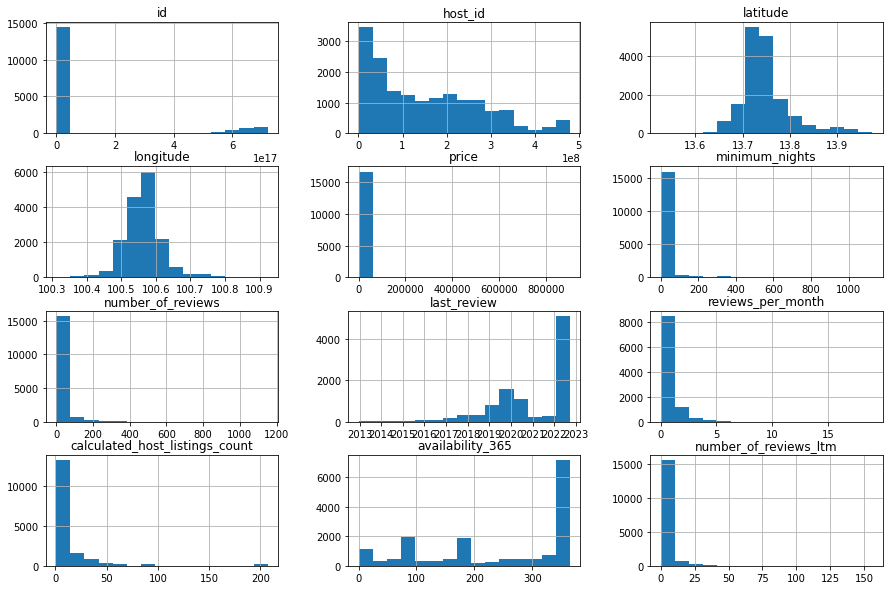

In [ ]:
# plot the histogram of the numeric attributes
df_clean.hist(bins=15, figsize=(15,10));

The histograms seem to show the presence of outliers in some attributes like the **price** and **minimum nights**.

One can confirm this hypothesis by the "describe( )" method.

In [ ]:
# summary of the numerical variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16640.000000,16640.000000,16640.000000,10067.000000,16640.000000,16640.000000,16640.000000
mean,2514.712079,15.197055,15.365084,0.658961,12.237500,242.802464,2.160397
std,16154.846054,49.626452,38.541922,0.903555,26.503542,127.908222,6.115644
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,800.000000,1.000000,0.000000,0.080000,1.000000,120.000000,0.000000
50%,1235.500000,1.000000,1.000000,0.320000,4.000000,294.000000,0.000000
75%,2000.000000,7.000000,12.000000,0.920000,11.000000,364.000000,1.000000
max,900000.000000,1125.000000,1151.000000,18.960000,207.000000,365.000000,156.000000


Some information draws our attention, such as:

*   The **price** variable has a minimum of 0. It doesn't make sense as no one would rent a place for free.
*   Also, **price** has a third quartile (Q3) of 2 thousand baht, but its maximum is 900 thousand baht. Clearly, there are outliers here.
*   The **minimum_nights** has a maximum value of 1125, and Q3 is at 7. Again, there are outliers in this variable.
*   The **number_of_reviews**, **reviews_per_month**, **calculated_host_listings_count**, and **number_of_reviews_ltm** probably contain outliers too, but we won't worry about them now.


To treat the outliers, the following steps will be executed: 

*   Set Q1 and Q3 to the variables that will be cleaned.
*   Calculate the interquartile range (IQR) for the variables.
*   Define the upper and lower limit for clipping the outliers, based on the IQR and evaluate the results.
*   Remove outliers.

Variable price:

In [ ]:
# identify the outliers of the variable price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR of the variable price: ', IQR_price)

# define the limits                                      
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit of price: ', sup_price)
print('Lower limit of price: ', inf_price)

IQR of the variable price:  1200.0
Upper limit of price:  3800.0
Lower limit of price:  -1000.0


Despite the absence of outliers in the lower limit, values equal to zero still need to be treated.

A boxplot will assist in the visualization of the difference between the data before and after the cleansing.

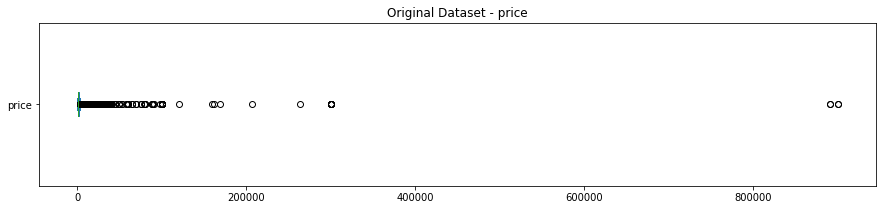

The original dataset has 16640 entries
1556 Entries with price above 3800.0
It represents 9.35% from the dataset


In [ ]:
# check the original Dataset
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Original Dataset - price')
plt.show()
print("The original dataset has {} entries".format(df.shape[0]))
print("{} Entries with price above 3800.0".format(len(df[df.price > sup_price])))
print("It represents {:.2f}% from the dataset".format((len(df[df.price > sup_price]) / df.shape[0])*100))

The **price** limit of **3800** is cutting 9.35% of entries. Although it is a relevant proportion of the total, there will still be 15,084 entries to be considered. So this will be the upper bound of the cleaned dataset.

Variable minimum nights:

In [ ]:
# identify the outliers of the variable minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR of the variable minimum_nights: ', IQR_minimum_nights)

# define the limits                                      
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Upper limit of minimum_nights: ', sup_minimum_nights)
print('Lower limit of minimum_nights: ', inf_minimum_nights)

IQR of the variable minimum_nights:  6.0
Upper limit of minimum_nights:  16.0
Lower limit of minimum_nights:  -8.0


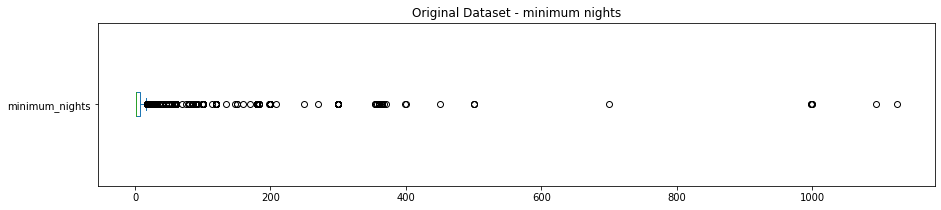

The dataset has 16640 entries
3336 Entries with minimum nights above 16
It represents 20.05% from the dataset


In [ ]:
# check the original Dataset
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Original Dataset - minimum nights')
plt.show()
print("The dataset has {} entries".format(df.shape[0]))
print("{} Entries with minimum nights above 16".format(len(df[df.minimum_nights > sup_minimum_nights])))
print("It represents {:.2f}% from the dataset".format((len(df[df.minimum_nights > sup_minimum_nights]) / df.shape[0])*100))

The upper limit of 16 nights eliminates 20.05% of the data. This is a large quantity to discard.

For minimum nights, 31 will be established as the upper limit. This boudary is based on short-term rental (STR) regulations in Thailand, as a property must be registered as a hotel if the owner wishes to rent for less than 30 days. 

Therefore, supposedly, there is a considerable amount of homestays in this range of up to 31 days. This would be because some hosts seek the minimum number of days that circumvent the STR regulations.





In [ ]:
# Checking data with the new upper limit
print("There are {} entries with minimum nights above 31".format(len(df[df.minimum_nights > 31])))
print("It represents {:.2f}% from the dataset".format((len(df[df.minimum_nights > 31]) / df.shape[0])*100))

There are 887 entries with minimum nights above 31
It represents 5.33% from the dataset


Removing 5.33% of the total entries, based on the regulation hypothesis seems reasonable.

Proceeding with the removal of the outliers.

In [ ]:
# removing the outliers to set a new DataFrame
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 31].index, axis=0, inplace=True)

print('Shape before cleansing: ', df.shape)
print('Shape after cleansing: ',df_clean.shape)
print(f'{round(((1 - (df_clean.shape[0]/df.shape[0]))*100), 2)}% of the entries were removed.')

Shape before cleansing:  (16640, 18)
Shape after cleansing:  (14250, 16)
14.36% of the entries were removed.


Checking the treated Dataset.

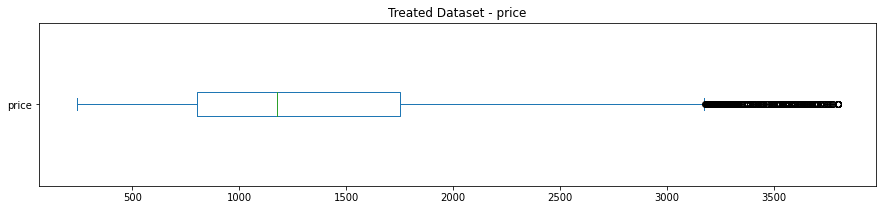

In [ ]:
# price boxplot of the treated Dataset
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Treated Dataset - price')
plt.show()

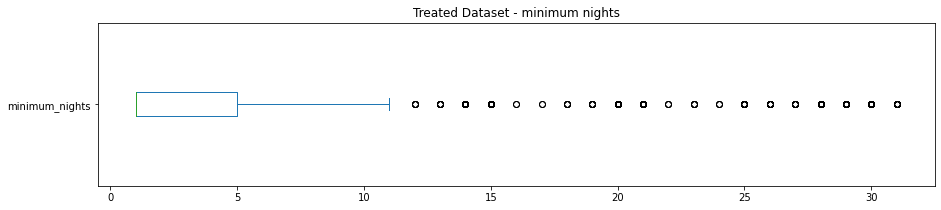

In [ ]:
# price boxplot of the treated Dataset
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Treated Dataset - minimum nights')
plt.show()

The cleansing results can be seen.

The boxplots show some data as outliers, however, these are calculated based on the new dataset.

To make sure we're not dealing with outliers that will spoil our analysis, we can recheck the histograms.

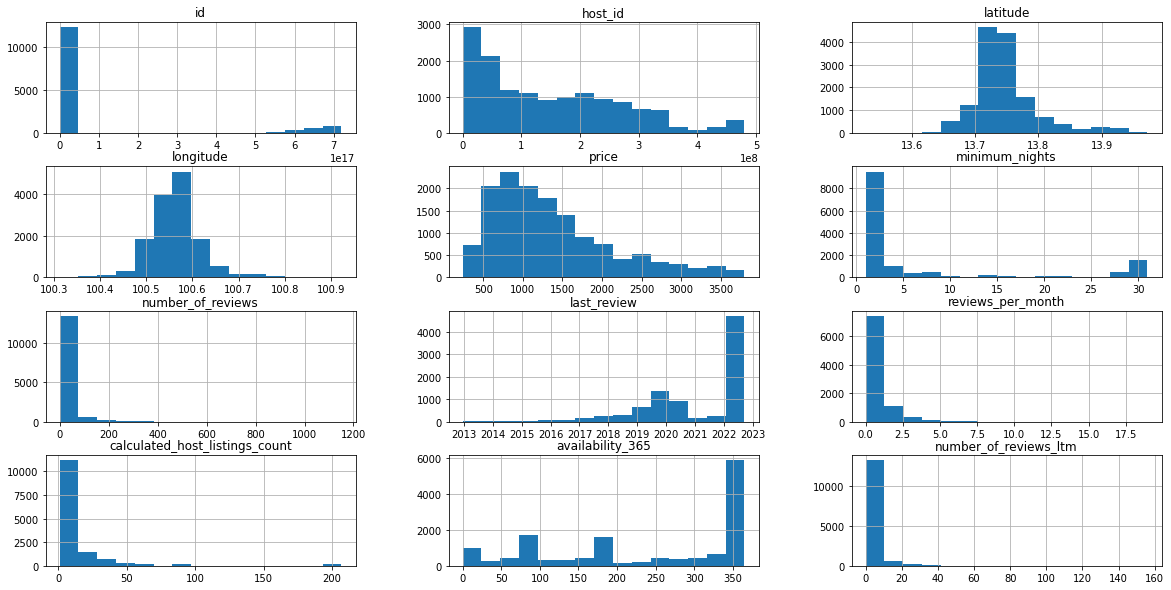

In [ ]:
# plot the histogram of the numeric attributes
df_clean.hist(bins=15, figsize=(20,10));

In [ ]:
# summary of the numerical variables from the treates dataset
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,14250.000000,14250.000000,14250.000000,8925.000000,14250.000000,14250.000000,14250.000000
mean,1366.489684,6.507930,16.152491,0.679927,12.801193,238.749333,2.340351
std,769.847381,10.081253,39.664603,0.918368,27.873167,128.102781,6.317968
min,241.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,800.000000,1.000000,0.000000,0.090000,1.000000,111.250000,0.000000
50%,1177.000000,1.000000,2.000000,0.330000,4.000000,281.000000,0.000000
75%,1750.000000,5.000000,13.000000,0.950000,12.000000,364.000000,2.000000
max,3800.000000,31.000000,1151.000000,18.960000,207.000000,365.000000,156.000000


The distributions appear to be free of outliers. The data is now ready to be analyzed.

### Categorical Analysis

In this stage, the categorical attributes of the Data Frame will be examined: **room type** and **neighbourhood**.


**Room types**

Airbnb hosts can list entire homes/apartments, private, shared rooms, or hotel rooms. Let us look what's the proportion between their offers in Bangkok.

In [ ]:
# percentage of each room type
df_clean.room_type.value_counts()/df.shape[0]

Entire home/apt    0.454808
Private room       0.332572
Hotel room         0.036298
Shared room        0.032692
Name: room_type, dtype: float64

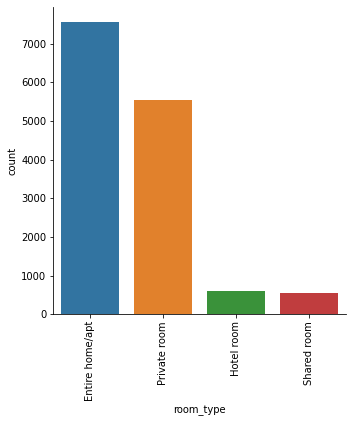

In [ ]:
# plot count distribution of categorical data
fig = sns.catplot(x = 'room_type', kind="count", data = df_clean, order = df_clean['room_type'].value_counts().index)
fig.set_xticklabels(rotation=90)
plt.show()

The most common room type for rent is an **entire home or apartment**, followed by **Private room**. **Hotel** and **shared rooms** represent a small part (about 3.5% each) of the residences offered in Bangkok through Airbnb. 

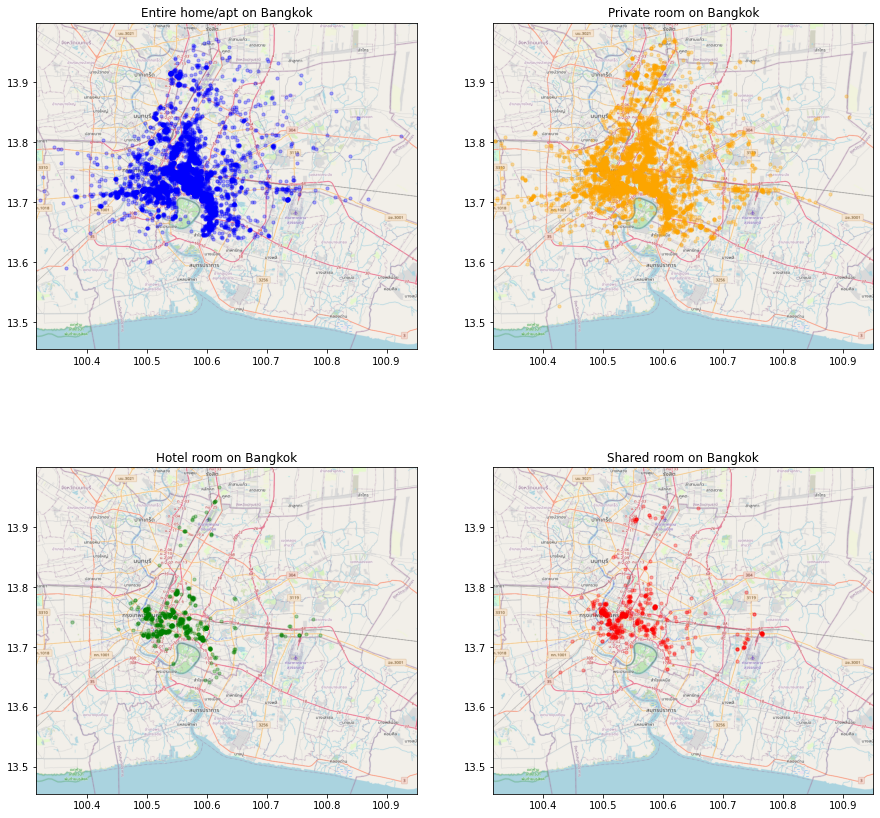

In [ ]:
# plot the room types on Bangkok map 

bangkok_map = plt.imread('https://raw.githubusercontent.com/AmiltonFerreira/airbnb/main/map.png') # import the map image

BBox = (100.3162, 100.9506, 13.4551, 13.9994) # define the coordinates that limit the map area

fig, axs = plt.subplots(2, 2, figsize = (15,15)) # adjust the the position of the plots

colors = ['blue', 'orange', 'green', 'red'] # colors to illustrate the room types
i = 0

for ax, room_type in zip(axs.flat, df_clean.room_type.value_counts().iteritems()): # for loop to iterate between the room types
    ax.scatter(df_clean.loc[lambda df_clean: df_clean['room_type'] == room_type[0]].longitude,
               df_clean.loc[lambda df_clean: df_clean['room_type'] == room_type[0]].latitude, zorder=1, alpha= 0.3, c = colors[i], s=10)
    ax.set_title(f'{room_type[0]} on Bangkok') # set the titles
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal') # add the map image to the background of the plot
    i += 1


From these plots, it's possible to observe that **entire homes/apts** and **private rooms** are spread over a large area of Bangkok. **Hotels** and **Shared rooms** tend to be concentrated in the center of the city and also in smaller clusters to the north and east.

**Neighbourhoods**

Now it's time to investigate the neighbourhoods of Bangkok. Which one has more lodgings advertised? Which one has the lowest average price?

In [ ]:
# check the 5 neighbourhoods with more offers
df_clean.neighbourhood.value_counts().head()

Khlong Toei    1808
Vadhana        1680
Ratchathewi     950
Huai Khwang     935
Bang Rak        702
Name: neighbourhood, dtype: int64

In [ ]:
# check the 5 neighbourhoods with less offers
df_clean.neighbourhood.value_counts().tail()

Thawi Watthana     25
Bang Khun thain    19
Nong Khaem         13
Nong Chok          12
Bang Bon            4
Name: neighbourhood, dtype: int64

The five neighbourghoods with more offers on the platform were **Khlong Toei**, **Vadhana**, **Ratchathewi**, **Huai Khwang**, and **Bang Rak**. On the other hand, the neighbourhoods with fewer residences announced in Airbnb are **Thawi Watthana**, **Bang Khun thain**, **Nong Khaem**, **Nong Chok**,  and **Bang Bon**.     

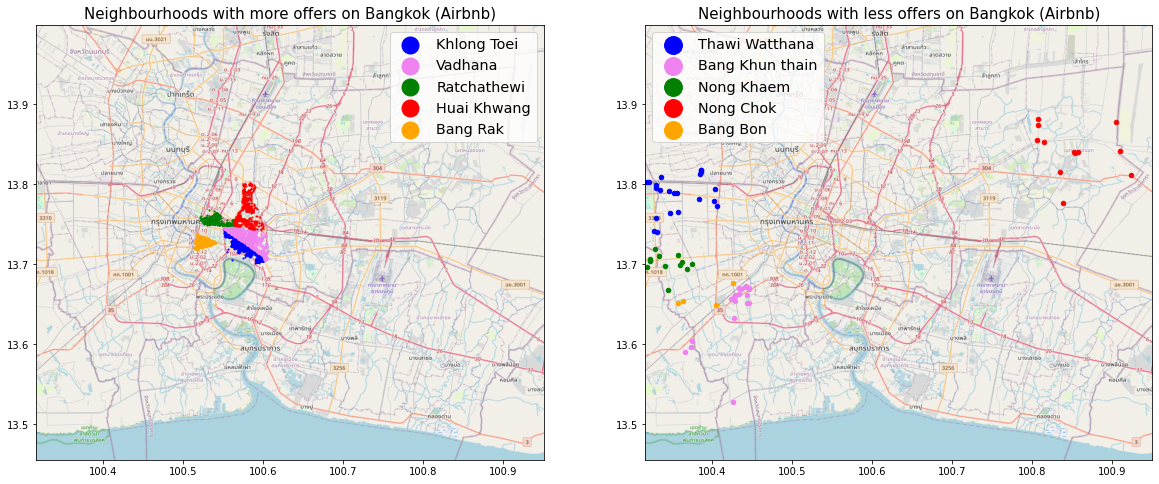

In [ ]:
# plot the neighbourhoods with more and less offers on Bangkok map 

fig, axs = plt.subplots(1, 2, figsize = (20,10)) # adjust the the position of the plots

colors = ['blue', 'violet', 'green', 'red', 'orange'] # colors to illustrate the neighbourhoods
i = 0

for neighbourhood in df_clean.neighbourhood.value_counts().head().iteritems():
# for loop to iterate between the neighbourhoods with more offers
    axs[0].scatter(df_clean.loc[lambda df_clean: df_clean['neighbourhood'] == neighbourhood[0]].longitude,
               df_clean.loc[lambda df_clean: df_clean['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=1)
    
    i += 1

axs[0].set_title('Neighbourhoods with more offers on Bangkok (Airbnb)', fontsize = 15) # set the title
axs[0].legend(fontsize = 'x-large', markerscale = 17) # set the legend

i = 0

for neighbourhood in df_clean.neighbourhood.value_counts().tail().iteritems():
# for loop to iterate between the neighbourhoods with less offers
    axs[1].scatter(df_clean.loc[lambda df_clean: df_clean['neighbourhood'] == neighbourhood[0]].longitude,
               df_clean.loc[lambda df_clean: df_clean['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=20)
    
    i += 1

axs[1].set_title('Neighbourhoods with less offers on Bangkok (Airbnb)', fontsize = 15) # set the title
axs[1].legend(fontsize = 'x-large', loc = 'upper left', markerscale = 4) # set the legend

for ax in axs:
  ax.set_xlim(BBox[0],BBox[1])
  ax.set_ylim(BBox[2],BBox[3])
  ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal') # add the map image to the background of the plot


The five neighborhoods with the most offers on Airbnb are located in the central area of ​​​​Bangkok, while the least popular are on the outskirts. That's probably because these neighbourhoods with more economic activities are located in the center of the city.

### Numeric Analysis

**Prices**



In [ ]:
# Bangkok median
df_clean.price.median()

1177.0

In [ ]:
# Bangkok mean
df_clean.price.mean()

1366.4896842105263

The median price of the homestays in Bangkok is 1177, while the mean price is 1366.

In [ ]:
# average price for the most expensive neighbourhoods
expensive_nbh = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]
expensive_nbh

neighbourhood
Parthum Wan    1905.788690
Bang Bon       1700.250000
Yan na wa      1653.670455
Vadhana        1648.822619
Bang Rak       1588.038462
Name: price, dtype: float64

The five neighbourhoods with the highest price mean are **Parthum Wan**, **Bang Bon**, **Yan na wa**, **Vadhana**, and **Bang Rak**.

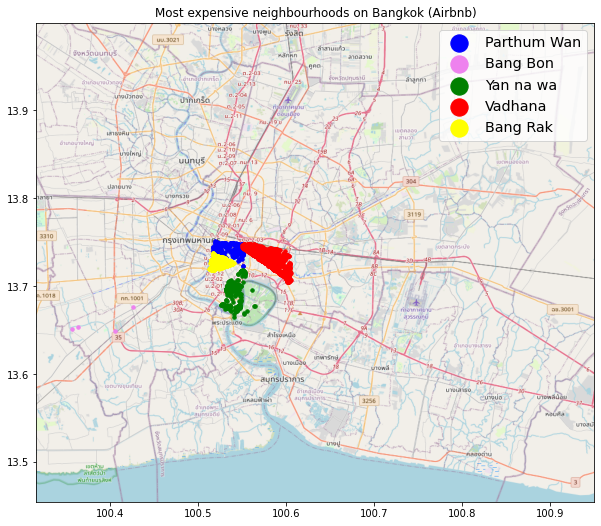

In [ ]:
# plot the five neighbourhoods with the highest price mean on Bangkok map 

fig, ax= plt.subplots(figsize = (10,10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in expensive_nbh.iteritems():
    ax.scatter(df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].longitude,
               df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=12)
    
    i += 1

ax.set_title('Most expensive neighbourhoods on Bangkok (Airbnb)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(fontsize = 'x-large', markerscale = 5)
ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal')

As said before, this central area of Bangkok is full of the financial activities of its commercial offices, as well as its vibrant nightlife scenes.

Pathum Wan, for example, is known for the shopping districts of Siam, one of the best in Southeast Asia, and Ratchaprasong. 

Vadhana is known as one of Bangkok’s most affluent districts, an excellent place for shopping and nightlife. 

Bang Bon is away from this crowded area, with agriculture being an important part of the area's economy. It should be noted that it was the neighborhood with the lowest number of advertised rooms. Therefore, its average price may be out of line with the prices actually charged for properties in that district.

In [ ]:
# average price for the less expensive neighbourhoods
cheap_nbh = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:-6:-1]
cheap_nbh

neighbourhood
Nong Khaem         756.153846
Bang Phlat        1027.566138
Thawi Watthana    1036.920000
Lat Phrao         1057.289474
Lat Krabang       1061.361905
Name: price, dtype: float64

The five neighbourhoods with the lowest price mean are **Phasi Charoen**,  **Min Buri**, **Lak Si**, **Bang Phlat**, and **Lat Krabang**.

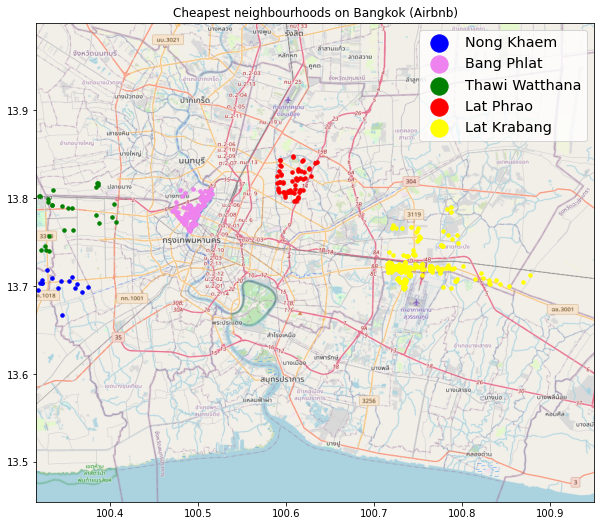

In [ ]:
# plot the five neighbourhoods with the lowest price mean on Bangkok map 

fig, ax= plt.subplots(figsize = (10,10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in cheap_nbh.iteritems():
    ax.scatter(df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].longitude,
               df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=12)
    
    i += 1

ax.set_title('Cheapest neighbourhoods on Bangkok (Airbnb)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(fontsize = 'x-large', markerscale = 5)
ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal')

**Minimum nights**

In [ ]:
# mean value of minimum_nights
df_clean.minimum_nights.mean()

6.507929824561404

The **minimum nights** mean of all accommodations is 6.5.

In [ ]:
# average minimum nights by room type
df_clean.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)[:5]

room_type
Entire home/apt    9.110597
Private room       3.996567
Hotel room         1.546358
Shared room        1.356618
Name: minimum_nights, dtype: float64

The **room type** has an influence on the **minimum nights** mean. Entire homes/apts have a minimum nights mean of almost 9 nights, while Shared rooms have a mean of 1.35.

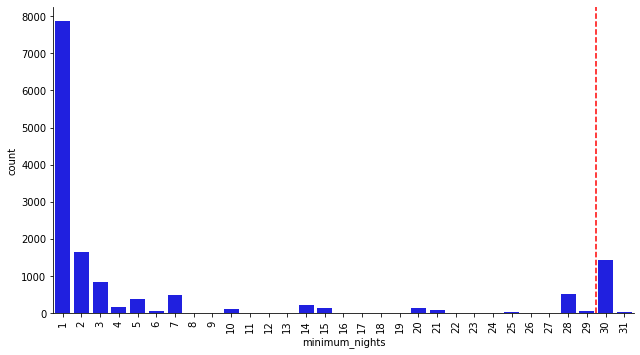

In [ ]:
# plot the barplot of the minimum nights
fig = sns.catplot(x = 'minimum_nights', kind="count", data = df_clean, color = 'blue', height = 5, aspect = 1.8)
fig.set_xticklabels(rotation=90)
plt.axvline(28.5, 0, 1, c = 'red', ls = '--')
plt.show()

The barplot shows a peak in deals with a 30-night minimum. The hypothesis that some hosts try to escape the STR regulation, previously presented, is ratified with this behavior.

**Correlation between variables**

In [ ]:
# correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.069812,-0.011503,0.076563,0.005406,-0.003598,0.017386
minimum_nights,-0.069812,1.000000,-0.032117,-0.128397,-0.064963,-0.104778,-0.090434
number_of_reviews,-0.011503,-0.032117,1.000000,0.654748,0.035024,-0.076218,0.414213
reviews_per_month,0.076563,-0.128397,0.654748,1.000000,0.081496,-0.062851,0.584884
calculated_host_listings_count,0.005406,-0.064963,0.035024,0.081496,1.000000,-0.011699,0.140305
availability_365,-0.003598,-0.104778,-0.076218,-0.062851,-0.011699,1.000000,-0.095812
number_of_reviews_ltm,0.017386,-0.090434,0.414213,0.584884,0.140305,-0.095812,1.000000


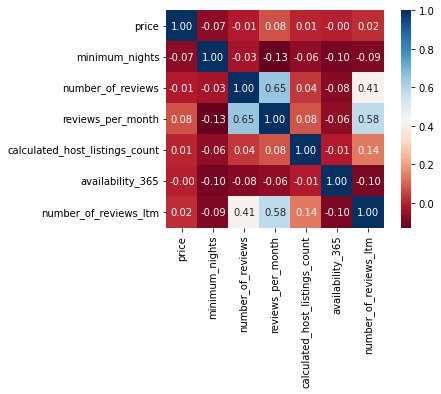

In [ ]:
# correlation heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

The only significative correlations are between the attributes that are related to the reviews. But this doesn't add much to the analysis.

## Conclusion


During this analysis, we were able to identify some of the particularities involving the accommodations announced on Airbnb in the city of Bangkok.

The room types, neighbourhoods, prices, and minimum nights data were inspected and some pieces of information could be obtained.

Entire homes/apartments and private rooms are by far the most common options offered in Airbnb.

The most expensive and the most offered neighbourhoods are located in the "heart" of Bangkok, the center area.

Hosts renting their entire home seek a longer period of contract. If you are looking to stay for a short period, maybe it's not the best option for you.

By the end of the day, after all this research, I'm sure you're ready to spend some days in Bangkok. At least, knowing where to stay won't be an issue.

## References

[1] [https://news.airbnb.com/about-us/](https://news.airbnb.com/about-us/)

[2] [https://news.airbnb.com/cheers-to-2022s-top-destinations-airbnb-shares-its-2023-travel-trends/](https://news.airbnb.com/cheers-to-2022s-top-destinations-airbnb-shares-its-2023-travel-trends/)

[3] [http://insideairbnb.com/about/](http://insideairbnb.com/about/)